Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 73.4MB 73kB/s 


Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


In [47]:
from google.colab import files

uploaded = files.upload()

Saving 2.jpeg to 2.jpeg
Saving 3.jpeg to 3.jpeg
Saving 4.jpeg to 4.jpeg
Saving 5.jpeg to 5.jpeg


2.jpeg


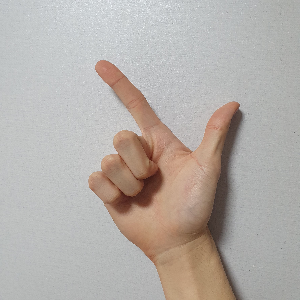

3.jpeg


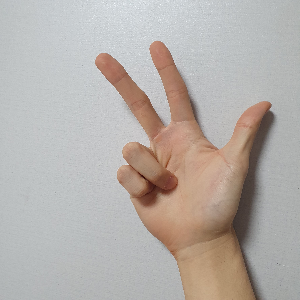

4.jpeg


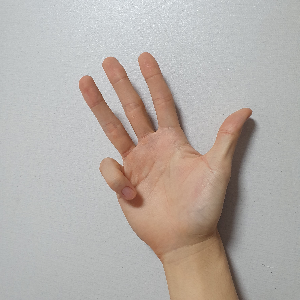

5.jpeg


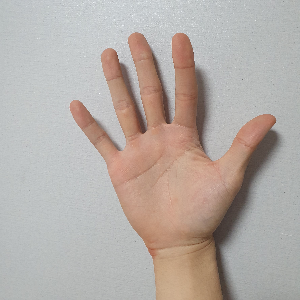

In [48]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  image = cv2.resize(image, (300, 300))
  cv2_imshow(image)

In [49]:
import mediapipe as mp
mp_hands = mp.solutions.hands


Handedness of 2.jpeg:
[classification {
  index: 1
  score: 0.9999992847442627
  label: "Right"
}
]
Hand landmarks of 2.jpeg:


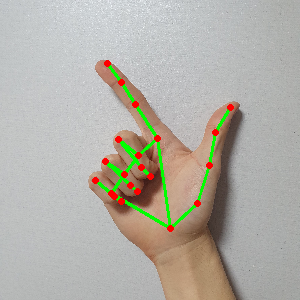

Handedness of 3.jpeg:
[classification {
  index: 1
  score: 0.9999992251396179
  label: "Right"
}
]
Hand landmarks of 3.jpeg:


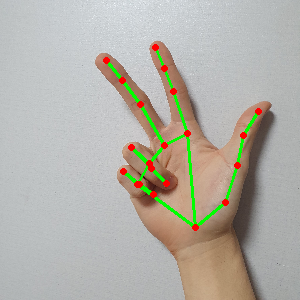

Handedness of 4.jpeg:
[classification {
  index: 1
  score: 0.9999993443489075
  label: "Right"
}
]
Hand landmarks of 4.jpeg:


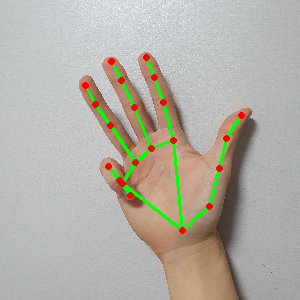

Handedness of 5.jpeg:
[classification {
  index: 1
  score: 0.9990642666816711
  label: "Right"
}
]
Hand landmarks of 5.jpeg:


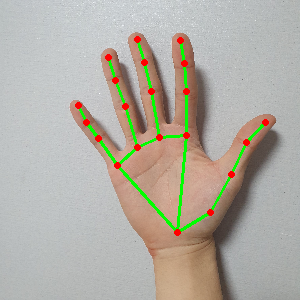

In [50]:
mp_drawing = mp.solutions.drawing_utils 

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    image = cv2.resize(image, (300, 300))
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
    image_hight, image_width, _ = image.shape
    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    print(f'Hand landmarks of {name}:')
    if not results.multi_hand_landmarks:
      continue
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2_imshow(cv2.flip(annotated_image, 1))

In [55]:


### Functions
def recognizeHandGesture(landmarks):
    thumbState = 'UNKNOWN'
    indexFingerState = 'UNKNOWN'
    middleFingerState = 'UNKNOWN'
    ringFingerState = 'UNKNOWN'
    littleFingerState = 'UNKNOWN'
    gesture = 0

    pseudoFixKeyPoint = landmarks[2]['x']
    if (landmarks[3]['x'] < pseudoFixKeyPoint and landmarks[4]['x'] < landmarks[3]['x']):
        thumbState = 'OPEN'
    elif (pseudoFixKeyPoint < landmarks[3]['x'] and landmarks[3]['x'] < landmarks[4]['x']):
        thumbState = 'CLOSE'    

    pseudoFixKeyPoint = landmarks[6]['y']
    if (landmarks[7]['y'] < pseudoFixKeyPoint and landmarks[8]['y'] < landmarks[7]['y']):
        indexFingerState = 'OPEN'    
    elif (pseudoFixKeyPoint < landmarks[7]['y'] and landmarks[7]['y'] < landmarks[8]['y']):
        indexFingerState = 'CLOSE'    

    pseudoFixKeyPoint = landmarks[10]['y']
    if (landmarks[11]['y'] < pseudoFixKeyPoint and landmarks[12]['y'] < landmarks[11]['y']):
        middleFingerState = 'OPEN'    
    elif (pseudoFixKeyPoint < landmarks[11]['y'] and landmarks[11]['y'] < landmarks[12]['y']):
        middleFingerState = 'CLOSE'

    pseudoFixKeyPoint = landmarks[14]['y']
    if (landmarks[15]['y'] < pseudoFixKeyPoint and landmarks[16]['y'] < landmarks[15]['y']):
        ringFingerState = 'OPEN'    
    elif (pseudoFixKeyPoint < landmarks[15]['y'] and landmarks[15]['y'] < landmarks[16]['y']):
        ringFingerState = 'CLOSE'
    
    pseudoFixKeyPoint = landmarks[18]['y']
    if (landmarks[19]['y'] < pseudoFixKeyPoint and landmarks[20]['y'] < landmarks[19]['y']):
        littleFingerState = 'OPEN'    
    elif (pseudoFixKeyPoint < landmarks[19]['y'] and landmarks[19]['y'] < landmarks[20]['y']):
        littleFingerState = 'CLOSE'
        
    fingers = [thumbState, indexFingerState, middleFingerState, ringFingerState, littleFingerState]
    openedFingers = list(filter(lambda x: x == "OPEN", fingers))

    if len(openedFingers) == 1:
        gesture = 1
    elif len(openedFingers) == 2:
        gesture = 2
    elif len(openedFingers) == 3:
        gesture = 3
    elif len(openedFingers) == 4:
        gesture = 4
    elif len(openedFingers) == 5:
        gesture = 5
    
    return gesture

def getStructuredLandmarks(landmarks):
    coordinates = []
    for j in range(42):
        if( j % 2 == 1):
            coordinates.append({ 'x': landmarks[j - 1], 'y': landmarks[j] })
    return coordinates

Handedness of 2.jpeg:
[classification {
  index: 1
  score: 0.9999992847442627
  label: "Right"
}
]
Hand landmarks of 2.jpeg:
recognized hand gesture:  2


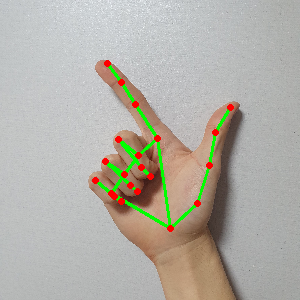

Handedness of 3.jpeg:
[classification {
  index: 1
  score: 0.9999992251396179
  label: "Right"
}
]
Hand landmarks of 3.jpeg:
recognized hand gesture:  3


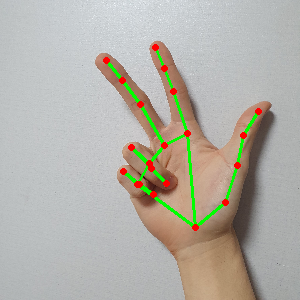

Handedness of 4.jpeg:
[classification {
  index: 1
  score: 0.9999993443489075
  label: "Right"
}
]
Hand landmarks of 4.jpeg:
recognized hand gesture:  4


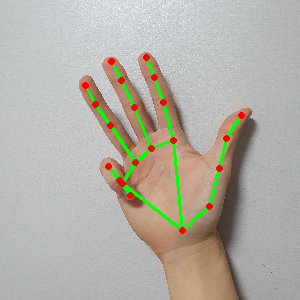

Handedness of 5.jpeg:
[classification {
  index: 1
  score: 0.9990642666816711
  label: "Right"
}
]
Hand landmarks of 5.jpeg:
recognized hand gesture:  5


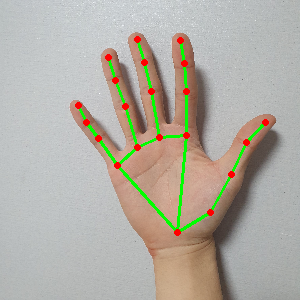

In [56]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    image = cv2.resize(image, (300, 300))

    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
    image_hight, image_width, _ = image.shape
    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    if not results.multi_hand_landmarks:
      continue

    annotated_image = cv2.flip(image.copy(), 1)
    
    coordinates = []
    for hand_landmarks in results.multi_hand_landmarks:
      # Find finger x, y coordinates 
      for data_point in hand_landmarks.landmark:
        coordinates.append(data_point.x)
        coordinates.append(data_point.y)

      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
      
    recognizedHandGesture = recognizeHandGesture(getStructuredLandmarks(coordinates))
    print("recognized hand gesture: ", recognizedHandGesture)
    cv2_imshow(cv2.flip(annotated_image, 1))